In [1]:
from config import *

Constants defined...


In [2]:
def gravitational_wave_luminosity(m1, m2, a):
    """
    Calculate the gravitational wave luminosity (power radiated) for two black holes.
    
    Parameters:
    m1 (float): Mass of the first black hole in g.
    m2 (float): Mass of the second black hole in g.
    a (float): Separation between the two black holes in cm.
    
    Returns:
    float: Gravitational wave luminosity in erg / s.
    """
    P = (32/5) * (c.G**4 / c.c**5) * ((m1 * m2)**2 * (m1 + m2)) / (a**5)
    return P


# Masses of the black holes
m1 = 30 * c.msun
m2 = 25 * c.msun

# Separation in cm
a = 100000 * 1e3 

# Calculate luminosity
luminosity = gravitational_wave_luminosity(m1, m2, a)
luminosity

5.049872353485648e+53

In [3]:
def drag_luminosity(rho, R, V, C_d):
    """
    Calculate the gravitational wave luminosity (power radiated) for two black holes.
    
    Parameters:
    m1 (float): Mass of the first black hole in g.
    m2 (float): Mass of the second black hole in g.
    a (float): Separation between the two black holes in cm.
    
    Returns:
    float: Gravitational wave luminosity in erg / s.
    """
    P = (1/2) * C_d *rho * 3.1415 * R**2.0 * V**3.0
    return P


In [4]:
rho = 100.0
R = 1e9 
V = 1e9
C_d = 1.0
luminosity = drag_luminosity(rho, R, V, C_d)
luminosity


1.5707500000000004e+47

In [5]:
def keplerian_velocity(m1, m2, a):
    """
    Calculate the Keplerian velocity for two masses orbiting each other.
    
    Parameters:
    m1 (float): Mass of the first body in g.
    m2 (float): Mass of the second body in g.
    a (float): Separation between the two masses in cm.
    
    Returns:
    float: Keplerian orbital velocity in cm per second.
    """
    M = m1 + m2  # Total mass
    v = (c.G * M / a)**0.5
    return v


kepler_velocity = keplerian_velocity(m1, m2, a)
kepler_velocity/1e5

85446.0198019779

### Use a polytropic Star with $\gamma$ = 4/3 for the density profile. Assume circular orbit and Kepler's law
### Actually using MESA model

Radius of AGN Star = Shock Radius :  1.0984451801615378


Text(0, 0.5, '$\\log_{10}\\, \\rho$')

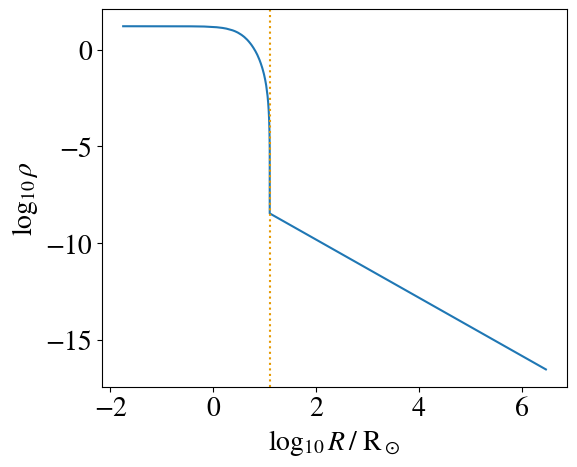

In [88]:
IMMORTAL = '../agnstars/adam_prototype_14547/grids/cs10/RHO_3d-17/LOGS/profile20.data'
IMMORTAL = './data/14547_cs10_RHO_3d-17_profile20.data'
FIGURES = './Figures/'
p = mr.MesaData(IMMORTAL)
cs_agn = 1e6
rho_agn = 3e-17
M = p.mass[0]
r_b = 2*c.G* M*c.msun / cs_agn**2.0
r_shock = 10**p.logR[0]*c.rsun
r_star = r_shock
print('Radius of AGN Star = Shock Radius : ', p.logR[0])
# Constants (assuming r_star, r_b, and c.rsun are already defined)
n = 1000
rho_agn = 3e-17  # Target density at r_b
T_star = 10**p.logT[0]

# Calculate r_stream
r_stream = np.linspace(r_star, r_b, n)
r_stream = r_stream / c.rsun  # Normalize by solar radius

# Initial rho_stream calculation
rho_stream = r_stream**(-3.0/2.0)
T_stream = r_stream**(-3.0/8.0)
v_stream = r_stream**(-1.0/2.0)

# Determine scaling factors to ensure rho_stream(r_b) = rho_agn,  T_stream(r_star) = T_star, V_stream(r_bondi) = cs_agn
scale_factor = rho_agn / rho_stream[-1]
scale_factor_T = T_star / T_stream[0] 
scale_factor_v = cs_agn / v_stream[-1]

# Apply the scaling factors
rho_stream_scaled = rho_stream * scale_factor
T_stream_scaled = T_stream * scale_factor_T
v_stream_scaled = v_stream * scale_factor_v

r_star = 10**p.logR
rho_star = 10**p.logRho
T_star = 10**p.logT
v_star = [0] * len(T_star)

r_star_stream = np.concatenate((r_star[::-1], r_stream))
rho_star_stream = np.concatenate((rho_star[::-1], rho_stream_scaled))
T_star_stream = np.concatenate((T_star[::-1],T_stream_scaled))
v_star_stream = np.concatenate((v_star[::-1],v_stream_scaled))

plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
axis.plot(np.log10(r_star_stream),np.log10(rho_star_stream))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}\, \rho$")

7733.04719820857


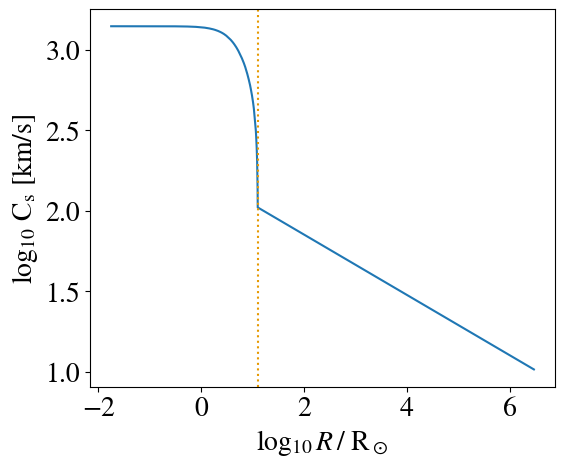

In [7]:
# Sound speed

gamma = 5.0/3.0
cs = (gamma*T_star_stream*c.kB/c.mp)**0.5

plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(cs/1e5))
axis.axvline(x=np.log10(r_shock/c.rsun), color=ORANGE, linestyle=':')
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}$ C$_{\rm s}$ [km/s]")
print(T_stream_scaled[-1])


In [8]:
from scipy.interpolate import interp1d

# Assuming rho_star and radius_star are defined and sorted in increasing order
#rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', fill_value="extrapolate")
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")
cs_star_function = interp1d(r_star_stream*c.rsun, cs, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")


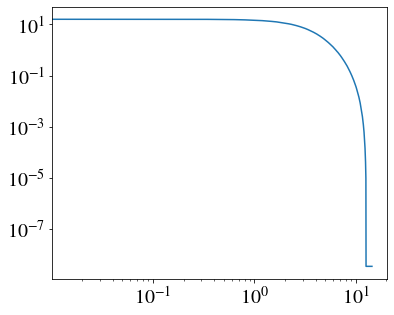

In [9]:
# Call rho_star_function(a) with a in cm

a = np.linspace(0, 1e12, 1000) # CGS

plt.loglog(a/c.rsun,rho_star_function(a))

In [11]:
C_d = 1.0
rho = rho_star_function(a)
m1 = m2 = 30 * c.msun
v = (c.G * (m1 + m2) / a)**0.5
P = (1/2) * C_d *rho * 3.1415 * Rbh**2.0 * V**3.0
P = (32/5) * (c.G**4 / c.c**5) * ((m1 * m2)**2 * (m1 + m2)) / (a**5)
Rbh = 2*c.G* M*c.msun / cs**2.0
cs = cs_star_function(a)

<ipython-input-11-c98b24c735fd>:4: RuntimeWarning: divide by zero encountered in true_divide
  v = (c.G * (m1 + m2) / a)**0.5


ValueError: operands could not be broadcast together with shapes (1000,) (1690,) 

In [12]:
from scipy.optimize import fsolve
import numpy as np


def equations(a):
    m1 = m2 = 30 * c.msun
    C_d = 1.0
    rho = rho_star_function(a)
    cs = cs_star_function(a)
    Rbh = 2*c.G*(m1+m2)/cs**2
    v = np.sqrt(c.G*(m1+m2)/a)
    P_drag = (1/2) * C_d * rho * np.pi * Rbh**2 * v**3
    P_grav = (32/5) * (c.G**4 / c.c**5) * ((m1 * m2)**2 * (m1 + m2)) / (a**5)
    
    return P_drag - P_grav

# Solve for a
initial_guess_for_a = 10e10
a_solution = fsolve(equations, initial_guess_for_a)

print(f"Solution for separation a: {a_solution}")

Solution for separation a: [3.42022302e+17]


## Plot the different luminosities

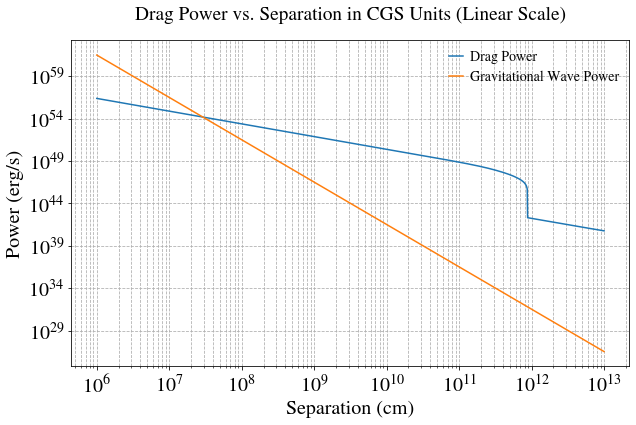

In [13]:

m1 = m2 = 10 * c.msun

# Separation range: from a small positive value to avoid division by zero to 10 Rsun
#a_values = np.logspace(-2, np.log10(10*c.rsun), 10)  # Avoiding 0 by starting from a small positive value

a_values = np.linspace(10e5, 1e13, 1000) # CGS


# Calculate P_grav across the range of separations
mu = m1*m2 / (m1 + m2)
M = m1+m2 
P_grav_values = (32/5) * (c.G**4 / c.c**5) * ((m1 * m2)**2 * (m1 + m2)) / (a_values**5)
#P_grav_values = (32/5) * (c.G**4 / c.c**5) * (mu**2) * (M**3) / (a_values**5)


# Correcting the missing constant definition and recalculating
C_d = 1.0  # Drag coefficient


v_cgs_linear = np.sqrt(c.G * (m1 + m2) / a_values)
Rbh_cgs_linear = 2 * c.G * (m1 + m2) / cs_star_function(a_values)**2

# Recalculate P for the range of separations using the drag formula
P_drag_values_cgs_linear = (1/2) * C_d * rho_star_function(a_values) * 3.1415 * Rbh_cgs_linear**2 * v_cgs_linear**3

# Plot in CGS units on a linear scale for the drag power
plt.figure(figsize=(10, 6))
plt.loglog(a_values, P_drag_values_cgs_linear, label='Drag Power')
plt.loglog(a_values, P_grav_values, label='Gravitational Wave Power')
#plt.loglog(a_values/1e5, rho_star_function(a_values/1e5), label='Gravitational Wave Power')

plt.xlabel('Separation (cm)')
plt.ylabel('Power (erg/s)')
plt.title('Drag Power vs. Separation in CGS Units (Linear Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [192]:
def calculate_gw_signals(a, M_1, M_2, d_obs):
    # Assume circular orbits

    M_total = M_1 + M_2
    
    # Calculate the orbital frequency at each timestep assuming circular orbit
    f_orb = 1 / (2 * np.pi) * np.sqrt(c.G * M_total / a**3)
    
    # Calculate the GW frequency, which is twice the orbital frequency
    f_gw = 2 * f_orb
    
    # Calculate the chirp mass
    M_chirp = (M_1 * M_2)**(3/5) / (M_total)**(1/5)
    
    # Calculate the GW amplitude
    h = (4 / d_obs) * (c.G * M_chirp / c.c**2) * (np.pi * f_gw * c.G * M_chirp / c.c**3)**(2/3)
    
    return f_gw, h

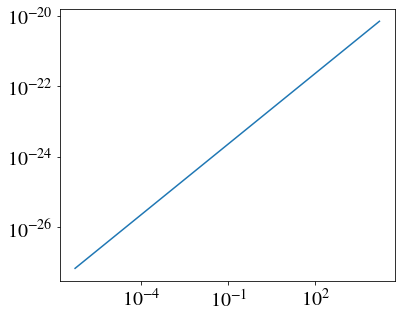

In [193]:
d_obs = 1.265e+27  # ~410Mpc 
f_gw, h = calculate_gw_signals(a_values,m1, m2,d_obs)
plt.loglog(f_gw,h)



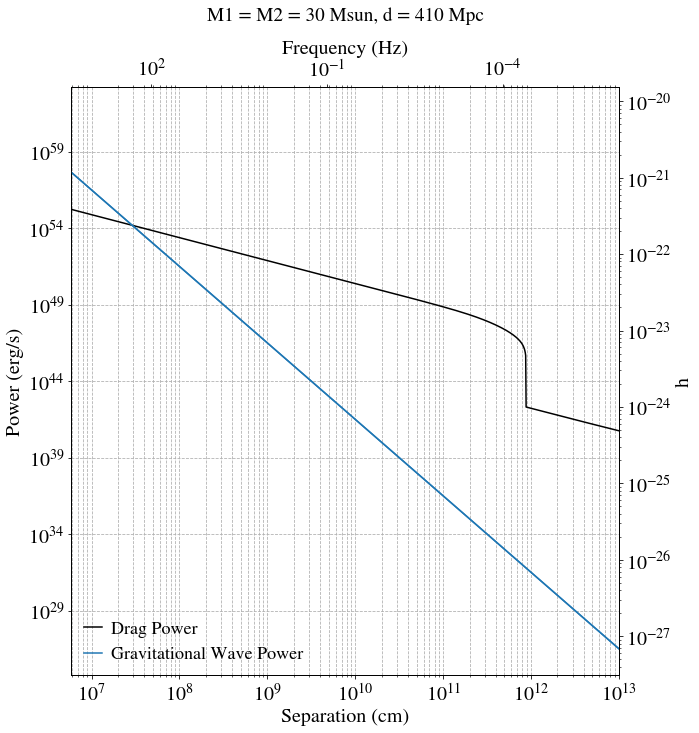

In [257]:
# Plotting with the gravitational wave frequency as a new x-axis (on top) that maps separation (a) to frequency (f_gw)
fig, ax1 = plt.subplots(figsize=(10, 10))

# Primary axis (bottom) for separation and power
color = 'black'
ax1.set_xlabel('Separation (cm)')
ax1.set_ylabel('Power (erg/s)', color=color)
ax1.loglog(a_values, P_drag_values_cgs_linear, label='Drag Power', color=color)
ax1.loglog(a_values, P_grav_values, label='Gravitational Wave Power', color='tab:blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which="both", ls="--")
ax1.legend(loc='lower left', fontsize = 18)


# Step 1: GW frequencies are already calculated as f_gw
# Step 2: Select a set of GW frequencies for tick labels (log-spaced within the range of f_gw)
f_gw_selected = np.logspace(np.log10(f_gw.min()), np.log10(f_gw.max()), 5)
f_gw_selected_rounded = np.power(10, np.round(np.log10(f_gw_selected)))

# Since the relationship between separation and GW frequency is non-linear,
# we directly calculate the separations for these selected GW frequencies using the inverse of our earlier calculation
# This step simulates finding corresponding separations, but we use the original formula adjusted for clarity and simplicity

# Step 3 & 4: Map these separations as tick positions on the top x-axis
separation_for_fgw = (c.G * (m1+m2) / (np.pi * f_gw_selected_rounded / 2)**2)**(1/3)

ax2 = ax1.twiny()
ax2.set_xscale('log')  # Ensure log scale for correct mapping


# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')


ax3 = ax1.twinx()
ax3.set_yscale('log')  # Ensure log scale for correct mapping
ax3.loglog(a_values, h, label='GW Strain at 410Mpc', color='tab:blue')
ax3.set_ylabel('h')

# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')

# Merger Line

rs_m1 = (2.0*c.G*m1) / (c.c**2.0)
rs_m2 = (2.0*c.G*m2) / (c.c**2.0)

r_merger = rs_m1 + rs_m2

ax1.axvline(x=r_merger)


ax2.set_xlim(r_merger, a_values.max())
ax1.set_xlim(r_merger, a_values.max())

fig.tight_layout()  # Adjust layout
#plt.title('Power and GW Frequency vs. Separation (M1 = M2 = 30Msun, d = 410Mpc)')
plt.title('M1 = M2 = 30 Msun, d = 410 Mpc')

plt.show()

In [180]:
# Add Mach #, Binding Energy, Time to merger at Pgw = Pdrag for assigned m1,m2

### Calculate the gravitational binding energy of the material above a certain radius r
The gravitational binding energy $U$ of a spherical shell of mass $\delta m$ at a distance $r$ from the center 
of the star is given by the formula:

$ dU = -\frac{G \, M(r) \, \delta m}{r}$


The total gravitational binding energy of the material above a certain radius $r$ 
is obtained by integrating this expression from the radius $r$ to the surface of the star $R$, 
assuming you know the mass distribution $M(r)$ within the star:

$U = - \int_{r}^{R} \frac{G \, M(r)}{r} \, dm $

Here $dm$ represents an infinitesimal mass element, and the integration sums up the contributions of all such elements from the radius \(r\) to the outer surface of the star. 



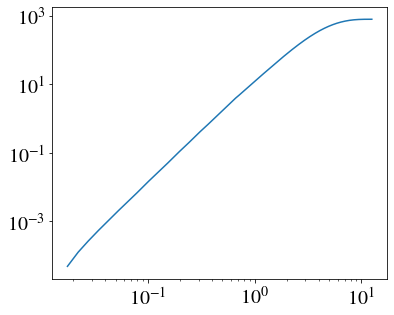

In [128]:
## Calculate cumulative mass

# Calculate the differences between consecutive elements in r_star_stream

r_star = 10**p.logR
rho_star = 10**p.logRho

dr = np.diff(r_star[::-1])


# Since np.diff returns an array that is one element shorter, you need to decide how to handle the initial dr.
# One common approach is to prepend the difference array with the first difference again or use an initial dr value.
# For example, we can assume the first dr is the same as the first actual calculated difference.
dr = np.insert(dr, 0, dr[0])

# Now calculate dm_star_stream  
dm_star = 4.0 * np.pi * rho_star[::-1] * dr * c.rsun * (r_star[::-1] * c.rsun) ** 2.0
#Taeho: It seems r_star and rhi_star need to be flipped. 

# And finally calculate the cumulative mass
Mr = np.cumsum(dm_star)
fig, ax = plt.subplots()
ax.plot(r_star[::-1], Mr / c.msun)
ax.set_xscale("log")
ax.set_yscale("log")

In [411]:
def calculate_binding_energy(r, Mr):
    """
    Calculate the gravitational binding energy Eb(r) for a star

    Parameters:
    - r: Array of radial coordinates (cm)
    - M: Array of mass enclosed within each radius (g)

    Returns:
    - Eb: Array of gravitational binding energies at each radius
    """
    
    # Calculate dm for each shell
    dm = np.diff(Mr, prepend=Mr[0])  # Correcting dm calculation

    # Calculate the energy contribution from each shell and sum it from r to R
    energy_contributions = -c.G * Mr[:-1] / r[:-1] * dm[1:]

    # Initialize the array for binding energy with zeros
    Eb = np.zeros_like(r)

    # Calculate cumulative sum from the outermost shell inward
    cumulative_energy = np.cumsum(energy_contributions[::-1])[::-1]

    # Assign the cumulative sum to the binding energy array, excluding the last element which has no shell outside it
    Eb[:-1] = cumulative_energy
    #Eb[1:] = np.cumsum(energy_contributions[::-1])[::-1]

    return Eb

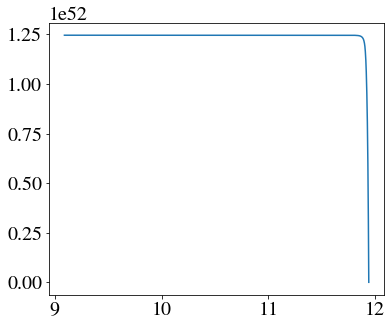

In [441]:
Eb = calculate_binding_energy(r_star*c.rsun,Mr)
#plt.loglog(r_star*c.rsun,np.abs(Eb))
#plt.plot(Mr/c.msun,np.log10(np.abs(Eb)))

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.loglog(r_star[::-1]*c.rsun,np.abs(Eb))

#ax.plot(Mr/c.msun,np.abs(Eb))

ax.plot(np.log10(r_star[::-1]*c.rsun),np.abs(Eb))

radial_coordinate = np.concatenate(([1e6], r_star[::-1] * c.rsun))
EB = np.concatenate(([Eb[0]], Eb))


# Add a point at small radius for plotting purposes


#ax.set_xlim(10e9,10e11)
#print(r_star[::-1]*c.rsun)

<ipython-input-546-0e0f4b4ca548>:3: RuntimeWarning: divide by zero encountered in log10
  ax.plot(Mr/c.msun,np.log10(np.abs(Eb)))


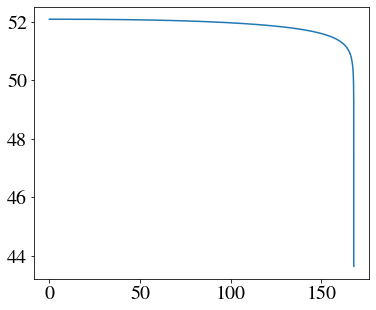

In [546]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(Mr/c.msun,np.log10(np.abs(Eb)))

NameError: name 'radial_coordinate' is not defined

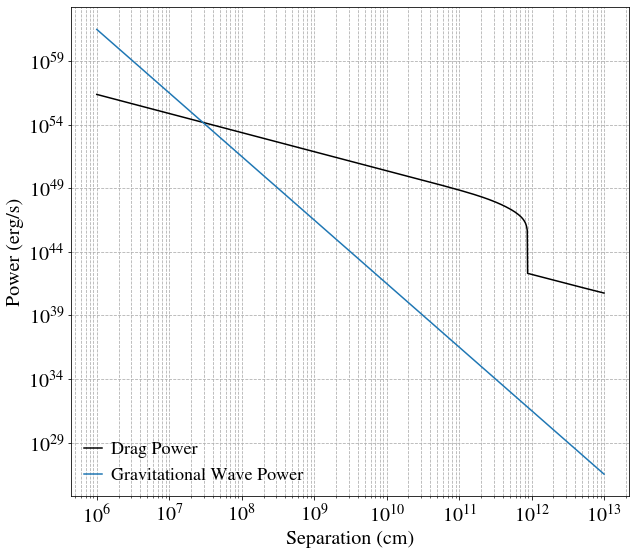

In [15]:
# Plotting with the gravitational wave frequency as a new x-axis (on top) that maps separation (a) to frequency (f_gw)
fig, ax1 = plt.subplots(figsize=(10, 9))

# Primary axis (bottom) for separation and power
color = 'black'
ax1.set_xlabel('Separation (cm)')
ax1.set_ylabel('Power (erg/s)', color=color)
ax1.loglog(a_values, P_drag_values_cgs_linear, label='Drag Power', color=color)
ax1.loglog(a_values, P_grav_values, label='Gravitational Wave Power', color='tab:blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which="both", ls="--")
ax1.legend(loc='lower left', fontsize = 18)


# Show Binding Energy
ax1.loglog(radial_coordinate,np.abs(EB),color=RED_PURPLE,ls=':',lw=2, label = 'AGN Star Binding Energy |Eb(r)|')

# Step 1: GW frequencies are already calculated as f_gw
# Step 2: Select a set of GW frequencies for tick labels (log-spaced within the range of f_gw)
f_gw_selected = np.logspace(np.log10(f_gw.min()), np.log10(f_gw.max()), 5)
f_gw_selected_rounded = np.power(10, np.round(np.log10(f_gw_selected)))

# Since the relationship between separation and GW frequency is non-linear,
# we directly calculate the separations for these selected GW frequencies using the inverse of our earlier calculation
# This step simulates finding corresponding separations, but we use the original formula adjusted for clarity and simplicity

# Step 3 & 4: Map these separations as tick positions on the top x-axis
separation_for_fgw = (c.G * (m1+m2) / (np.pi * f_gw_selected_rounded / 2)**2)**(1/3)

ax2 = ax1.twiny()
ax2.set_xscale('log')  # Ensure log scale for correct mapping


# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')


ax3 = ax1.twinx()
ax3.set_yscale('log')  # Ensure log scale for correct mapping
ax3.loglog(a_values, h, label='GW Strain at 410Mpc', color='tab:blue')
ax3.set_ylabel('h')

# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')

# Merger Line

rs_m1 = (2.0*c.G*m1) / (c.c**2.0)
rs_m2 = (2.0*c.G*m2) / (c.c**2.0)

r_merger = rs_m1 + rs_m2

ax1.axvline(x=r_merger)


ax2.set_xlim(r_merger, a_values.max())
ax1.set_xlim(r_merger, a_values.max())

#ax2.set_ylim(r_merger, a_values.max())
#ax1.set_ylim(1e25, 1e59)

fig.tight_layout()  # Adjust layout
#plt.title('Power and GW Frequency vs. Separation (M1 = M2 = 30Msun, d = 410Mpc)')
plt.title('M1 = M2 = 30 Msun, d = 410 Mpc')

plt.show()

In [ ]:
## Keplerian Velocity
fig, ax = plt.subplots(figsize=(10, 10))

M = m1 + m2  # Total mass
vk = (c.G * M / a_values)**0.5
ax.loglog(a_values,vk/c.c,label=r'V$_{\rm k}$ / $c$')

CS = np.concatenate(([cs[0]], cs))
RS = np.concatenate(([1e6], r_star_stream*c.rsun))


ax.loglog(RS,CS/c.c,label=r'C$_{\rm s}$ / $c$')

ax.set_xlim(r_merger, a_values.max())     

ax.legend()
ax.set_xlabel('Radius (cm)')
ax.set_ylabel(r'$\nu/c$')

#ax.plot(np.log10(r_star_stream),np.log10(cs/1e5))



In [ ]:

# Interpolating vk to be defined at the same radial distances as Cs
CS_interp_func = interp1d(RS, CS, kind='linear', bounds_error=False, fill_value="extrapolate")
CS_interpolated = CS_interp_func(a_values)

# Calculating vk/Cs
VK_over_CS =  vk / CS_interpolated

fig, ax = plt.subplots(figsize=(10, 4))

ax.loglog(a_values, VK_over_CS, label=r'$v_k / C_s$')

ax1 = ax.twinx()
ax1.loglog(a_values, vk/c.c, label=r'$v_k / c$',color=BLUE_GREEN)

ax1.set_ylabel(r'$v_k / c$')

ax.set_xlabel('Separation (cm)')
ax.set_ylabel('Mach')
plt.title('Velocity Ratio vs Radial Distance')
ax.legend(loc='lower left', fontsize = 18)
ax1.legend(loc='upper right', fontsize = 18)
fig.tight_layout()  # Adjust layout
ax.grid(True, which="both", ls="--")


ax.set_xlim(r_merger, a_values.max())


In [ ]:
a_values = np.linspace(10e5, 1e13, 1000) # CGS

plt.loglog(a_values,f_gw)

# Secondary axis (top) for GW frequency
#ax2 = ax1.twinx()
#ax2.loglog(a_values,f_gw, label='GW Frequency',color='tab:gray')
#ax2.legend(loc='lower right')
#ax2.set_ylim(1e-2,1e5)
#ax2.set_ylabel('Frequency (Hz)')



In [ ]:
import PhenomA as pa
import pandas as pd
import LISA as li

DATA = './data/'
# READ LIGO O3 Sensitivity data (from https://git.ligo.org/sensitivity-curves/o3-sensitivity-curves)
H1 = 'O3-H1-C01_CLEAN_SUB60HZ-1262197260.0_sensitivity_strain_asd.txt'  
L1 = 'O3-L1-C01_CLEAN_SUB60HZ-1262141640.0_sensitivity_strain_asd.txt'
# Adjust sep according to your delimiter (e.g., '\t' for tab-delimited files)
dfh1 = pd.read_csv(DATA+H1, sep='\t', header=None)  # Use header=None if the file doesn't contain header row
dfl1 = pd.read_csv(DATA+L1, sep='\t', header=None)

# Access columns as df[0], df[1], ...
f_H1 = dfh1[0].to_numpy()
h_H1 = dfh1[1].to_numpy()
f_L1 = dfl1[0].to_numpy()
h_L1 = dfl1[1].to_numpy()

# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
Sn = lisa.Sn(f)


fig, ax = plt.subplots(1, figsize=(8,6))
plt.tight_layout()

ax.set_xlabel(r'f [Hz]', fontsize=20, labelpad=10)
ax.set_ylabel(r'h', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_xlim(1.0e-5, 1e4)
ax.set_ylim(1.0e-24, 1.0e-15)

ax.loglog(f, np.sqrt(f*Sn),label = 'LISA Sensitivity') # plot the characteristic strain
ax.loglog(f_H1, h_H1,label = 'LIGO O3, H1 Sensitivity') # plot the characteristic strain
ax.loglog(f_L1, h_L1,label = 'LIGO O3, L1 Sensitivity') # plot the characteristic strain

ax.loglog(f_gw,h,color ='black', label='GW150914')

ax.legend()
plt.show()
    
   

NameError: name 'radial_coordinate' is not defined

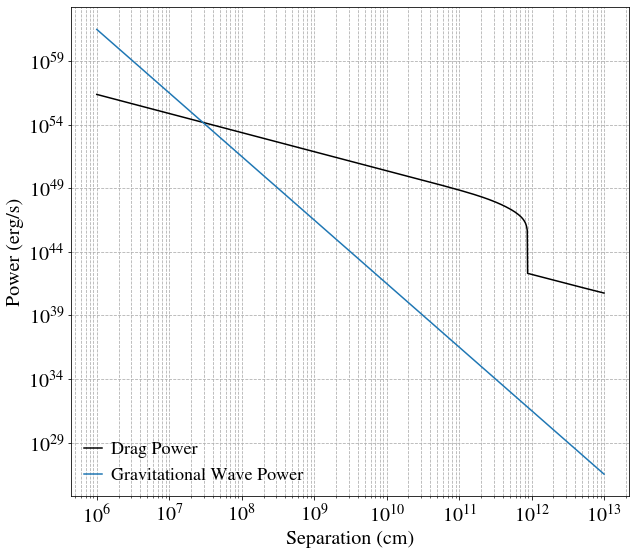

In [16]:
# Plotting with the gravitational wave frequency as a new x-axis (on top) that maps separation (a) to frequency (f_gw)
fig, ax1 = plt.subplots(figsize=(10, 9))

# Primary axis (bottom) for separation and power
color = 'black'
ax1.set_xlabel('Separation (cm)')
ax1.set_ylabel('Power (erg/s)', color=color)
ax1.loglog(a_values, P_drag_values_cgs_linear, label='Drag Power', color=color)
ax1.loglog(a_values, P_grav_values, label='Gravitational Wave Power', color='tab:blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which="both", ls="--")
ax1.legend(loc='lower left', fontsize = 18)


# Show Binding Energy
ax1.loglog(radial_coordinate,np.abs(EB),color=RED_PURPLE,ls='--',lw=3, label = 'AGN Star Binding Energy |Eb(r)|')



# Step 1: GW frequencies are already calculated as f_gw
# Step 2: Select a set of GW frequencies for tick labels (log-spaced within the range of f_gw)
f_gw_selected = np.logspace(np.log10(f_gw.min()), np.log10(f_gw.max()), 5)
f_gw_selected_rounded = np.power(10, np.round(np.log10(f_gw_selected)))

# Since the relationship between separation and GW frequency is non-linear,
# we directly calculate the separations for these selected GW frequencies using the inverse of our earlier calculation
# This step simulates finding corresponding separations, but we use the original formula adjusted for clarity and simplicity

# Step 3 & 4: Map these separations as tick positions on the top x-axis
separation_for_fgw = (c.G * (m1+m2) / (np.pi * f_gw_selected_rounded / 2)**2)**(1/3)

ax2 = ax1.twiny()
ax2.set_xscale('log')  # Ensure log scale for correct mapping


# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')

# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')


ax3 = ax1.twinx()
ax3.set_yscale('log')  # Ensure log scale for correct mapping
ax3.loglog(a_values, h, label='GW Strain at 410Mpc', color='tab:blue')
ax3.set_ylabel('h')


# Merger Line 

rs_m1 = (2.0*c.G*m1) / (c.c**2.0)
rs_m2 = (2.0*c.G*m2) / (c.c**2.0)

r_merger = rs_m1 + rs_m2

ax1.axvline(x=r_merger)



ax2.set_xlim(r_merger, a_values.max())
ax1.set_xlim(r_merger, a_values.max())

#ax2.set_ylim(r_merger, a_values.max())
#ax1.set_ylim(1e25, 1e59)

fig.tight_layout()  # Adjust layout
#plt.title('Power and GW Frequency vs. Separation (M1 = M2 = 30Msun, d = 410Mpc)')
plt.title('M1 = M2 = 30 Msun, d = 410 Mpc')


### BOTTOM PLOT


# Interpolating vk to be defined at the same radial distances as Cs
CS_interp_func = interp1d(RS, CS, kind='linear', bounds_error=False, fill_value="extrapolate")
CS_interpolated = CS_interp_func(a_values)

# Calculating vk/Cs
VK_over_CS =  vk / CS_interpolated

fig, ax = plt.subplots(figsize=(10, 4))

ax.loglog(a_values, VK_over_CS, label=r'$v_k / C_s$')

ax1 = ax.twinx()
ax1.loglog(a_values, vk/c.c, label=r'$v_k / c$',color=BLUE_GREEN)

ax1.set_ylabel(r'$v_k / c$')

ax.set_xlabel('Separation (cm)')
ax.set_ylabel('Mach')
plt.title('Velocity Ratio vs Radial Distance')
ax.legend(loc='lower left', fontsize = 18)
ax1.legend(loc='upper right', fontsize = 18)
fig.tight_layout()  # Adjust layout
ax.grid(True, which="both", ls="--")


ax.set_xlim(r_merger, a_values.max())




plt.show()

In [ ]:
#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.02)  # Remove space between subplots


# Show Binding Energy
axs[0].loglog(radial_coordinate,np.abs(EB),color=RED_PURPLE,ls=':',lw=2, label = 'AGN Star Binding Energy [erg]')

# Primary axis (bottom) for separation and power
color = 'black'
#axs[0].set_xlabel('Separation (cm)')
axs[0].set_ylabel('Power (erg/s)', color=color)
axs[0].loglog(a_values, P_drag_values_cgs_linear, label='Drag Power', color=color)
axs[0].loglog(a_values, P_grav_values, label='Gravitational Wave Power', color='tab:red')
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].grid(True, which="both", ls="--")
axs[0].legend(loc='lower left', fontsize = 18)
axs[0].set_xlim(r_merger, a_values.max())
axs[0].set_xticklabels('')


#ax1.set_xlim(r_merger, a_values.max())



# Step 1: GW frequencies are already calculated as f_gw
# Step 2: Select a set of GW frequencies for tick labels (log-spaced within the range of f_gw)
f_gw_selected = np.logspace(np.log10(f_gw.min()), np.log10(f_gw.max()), 5)
f_gw_selected_rounded = np.power(10, np.round(np.log10(f_gw_selected)))
separation_for_fgw = (c.G * (m1+m2) / (np.pi * f_gw_selected_rounded / 2)**2)**(1/3)

ax2 = axs[0].twiny()
ax2.set_xscale('log')  # Ensure log scale for correct mapping


# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')
# Setting the calculated separations as tick positions and formatting labels for GW frequency
ax2.set_xticks(separation_for_fgw)
ax2.set_xticklabels(["$10^{{{:.0f}}}$".format(np.log10(f)) for f in f_gw_selected_rounded])
ax2.set_xlabel('Frequency (Hz)')

ax3 = axs[0].twinx()
ax3.set_yscale('log')  # Ensure log scale for correct mapping
ax3.loglog(a_values, h, label='GW Strain at 410Mpc', color='tab:red')
ax3.set_ylabel('h')

ax2.set_xlim(r_merger, a_values.max())

# Plot on the second subplot (bottom)


axs1 = axs[1].twinx()
axs[1].loglog(a_values, VK_over_CS, label=r'$v_k / C_s$')
axs1.loglog(a_values, vk/c.c, label=r'$v_k / c$',color=BLUE_GREEN)

axs[1].set_xlabel('Radial Distance (units of R)')
axs[1].set_ylabel(r'$v_k / C_s$')
axs[1].legend(loc='upper left')
axs[1].grid(True)


axs1.set_ylabel(r'$v_k / c$')

axs[1].set_xlabel('Separation (cm)')
axs[1].set_ylabel('Mach')
axs[1].legend(loc='lower left', fontsize = 18)
axs1.legend(loc='upper right', fontsize = 18)
axs[1].grid(True, which="both", ls="--")

axs[1].set_xlim(r_merger, a_values.max())

axs[0].text(5e9, 10e59, r'M$_1$ = M$_2$ = 30 M$_\odot$, d = 410 Mpc',fontsize=20)

plt.tight_layout()

plt.savefig(FIGURES+'power.pdf',bbox_inches='tight')
#plt.show()

## Things to do:
- Double check Eb calculation
- Implement Mach number dependency on Cd
- Include GW radiation (in Post-Newtonian Approximation) and add to dynamic integration
- Calculate velocity profile in the accretion stream. Make a nice visualization of properties of star+stream (rho, cs, mass, v_k)
- Implement accretion (first calculate and store Mdot_bhl). We'll use it in postprocess to compare to binding energies etc
- Calculate BH accretion luminosity. Evaluate possible role of feedback (eg. compare injected energy from BHL with binding energy in the envelope)
- Calculate time to merger

### Cumulative Mass

In [17]:

# Interpolating vk to be defined at the same radial distances as Cs
CS_interp_func = interp1d(RS, CS, kind='linear', bounds_error=False, fill_value="extrapolate")
CS_interpolated = CS_interp_func(a_values)


# Calculating vk/Cs
VK_over_CS =  vk / CS_interpolated

fig, ax = plt.subplots(figsize=(10, 4))

ax.loglog(r_star[::-1]*c.rsun, Mr/c.msun, label='M$_\odot$')

ax.set_xlabel('Separation (cm)')
ax.set_ylabel('M$_\odot$')
plt.title('Mass')
ax.legend(loc='lower left', fontsize = 18)
fig.tight_layout()  # Adjust layout
ax.grid(True, which="both", ls="--")


ax.set_xlim(r_merger, a_values.max())
ax.set_ylim(0.0001, 250)

NameError: name 'RS' is not defined

In [18]:
plt.plot(np.log10(r_star[::-1]*c.rsun), np.log10(Mr/c.msun))

NameError: name 'Mr' is not defined

### Implement Mach dependend gravodrag coefficient $C_d$

In [19]:
## We follow  Kim & Kim 2007,2009, which is the straightforward extension of Ostriker 1999 for circular-orbit perturber. 
## Then a modification to this approach to include nonlinear effects is provided in Kim 2010
## References: K&K 2007 https://iopscience.iop.org/article/10.1086/519302/pdf Ostriker 1999 https://iopscience.iop.org/article/10.1086/306858/pdf Kim 2010 https://iopscience.iop.org/article/10.1088/0004-637X/725/1/1069/pdf

## I is the Couloumb Logarithm, and is given by

def calculate_coulomb_logarithm(Mach, a, rmin):
    """
    Calculate the Coulomb Logarithm (I) given the Mach number (M) and variable 'a'. 
    Follows Schneider et al. 2024, which basically uses Kim 2010 + Kim & Kim 2007
    
    Parameters:
    M (float): The Mach number
    a (float): radial distance of the perturber's orbit  
    rmin (float): The characteristic size of the perturber
    
    Returns:
    float: The Coulomb Logarithm (I)
    """
    M = Mach
    
    if M < 1.0:
        return 0.7706 * np.log((1.0 + M) / (1.0004 - 0.9185 * M)) - 1.473 * M
    elif 1.0 <= M < 4.4:
        return np.log(330.0*(a / rmin) * ((M - 0.71)**5.72) / (M**9.58))
    else:  # For 4.4 ≤ M
        return np.log((a / rmin) / (0.11 * M + 1.65))
    
    
## Calculate Drag Force

def calculate_drag_force(C_d, Mp, v_rel, a, cs, rho, rmin):
    """
    Calculate Drag Force on perturber of mass Mp and Vrel in medium with rho and cs 
    Follows Schneider et al. 2024, which basically uses Kim 2010 + Kim & Kim 2007  
    C_d is a free parameter in this implementation. We will mostly set C_d = 1.0
    """
    
    ## Define dimensioneless parameters 
    Mach = v_rel/cs 
    B = c.G*Mp / (a*cs**2.0)    
    eta_b = B / (Mach**2.0 -1.0)
    ## Nonlinear correction term for the density
    f_rho = 1.0 + ((0.46*B**1.1) / (Mach**2.0 - 1.0)**0.11)
    
    I = calculate_coulomb_logarithm(Mach, a, rmin)
    
    if (eta_b > 0.1 and Mach > 1.01):
        Fd = C_d * (0.7/eta_b**0.5) * 4.0 * np.pi * f_rho * rho * (c.G * Mp)**2.0 / v_rel**2.0 
    else:
        Fd = C_d * I * 4.0 * np.pi * rho * (c.G * Mp)**2.0 / v_rel**2.0  
    return Fd     
        


In [20]:
# Assume C_d = 1.0, Mp = 30Msun, Vrel = 0.01 c.c, a = 1e10 cm, Cs = 0.001 c.c, rho = 1, rmin = 1e7 
C_d = 1.0
Mp = 30*c.msun
Vrel = 0.01*c.c 
a = 1e10 
Cs = 0.001*c.c
rho = 1.0
rmin = 1e7

drag = calculate_drag_force(C_d, Mp, Vrel, a, Cs, rho, rmin)

In [21]:
print(drag)

1.6665686948498037e+41


In [69]:
#calculating characteristic radii
def calc_RLradius_Eggleton(q, distance):
    """
        calculate the size of the Roche Lobe using the Eggleton formula
        
    parameters: 
        q (float) = (mass of donor) / (mass of accretor)
        distance (float) = distance between the donor and accretor
        
    Returns:
    float: Roche Lobe size of the donor
        
    """
    RL_factor = 0.49 * q**(2.0/3.0) /(0.6 * q**(2.0/3.0) + np.log(1.0 + q**(1.0/3.0)))
    return RL_factor * distance

def calc_separation_RL_Eggleton(q, donor_radius):
    """
        calculate the semimajor axis for which the radius of the donor is equal to the Roche lobe radius, using the Eggleton formula
        
    parameters: 
        q (float) = (mass of donor) / (mass of accretor)
        donor_radius (float) = radius of the donor
        
    Returns:
    float: semimajor axis
        
    """
    RL_factor = 0.49 * q**(2.0/3.0) /(0.6 * q**(2.0/3.0) + np.log(1.0 + q**(1.0/3.0)))
    return donor_radius / RL_factor

def calc_tidal_radius(m, rhoc):
    """
        calculate the tidal disruption radius as,
        r_t = (m / rhoc)^(1/3)
        
    parameters: 
        m (float) = mass of the compact object
        rhoc (float) = core density (maximum) density of the star
        
    Returns:
    float: full tidal disruption radius
        
    """
    rt = (m / rhoc)**(1.0/3.0)
    return rt

<ipython-input-19-91a4516a3800>:44: RuntimeWarning: invalid value encountered in double_scalars
  f_rho = 1.0 + ((0.46*B**1.1) / (Mach**2.0 - 1.0)**0.11)


3.9780000000000003e+34
780.1540100633722 15.933751284842499 12.54426384954609


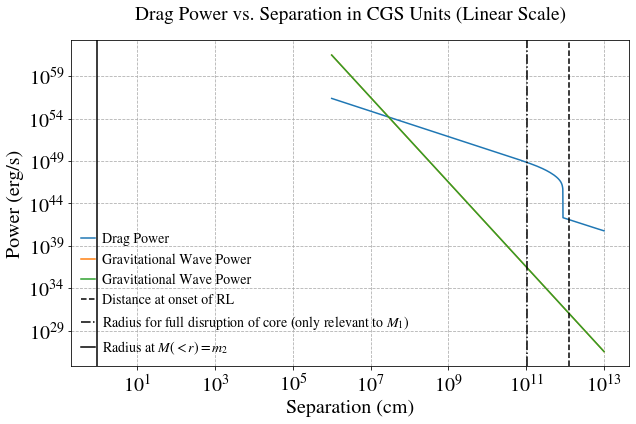

In [127]:

m1 = m2 = 10 * c.msun

# Separation range: from a small positive value to avoid division by zero to 10 Rsun
#a_values = np.logspace(-2, np.log10(10*c.rsun), 10)  # Avoiding 0 by starting from a small positive value

a_values = np.linspace(10e5, 1e13, 1000) # CGS


# Calculate P_grav across the range of separations
mu = m1*m2 / (m1 + m2)
M = m1+m2 
P_grav_values = (32/5) * (c.G**4 / c.c**5) * ((m1 * m2)**2 * (m1 + m2)) / (a_values**5)
#P_grav_values = (32/5) * (c.G**4 / c.c**5) * (mu**2) * (M**3) / (a_values**5)


# Correcting the missing constant definition and recalculating
C_d = 1.0  # Drag coefficient


v_cgs_linear = np.sqrt(c.G * (m1 + m2) / a_values)
Rbh_cgs_linear = 2 * c.G * (m1 + m2) / cs_star_function(a_values)**2

# Recalculate P for the range of separations using the drag formula
P_drag_values_cgs_linear = (1/2) * C_d * rho_star_function(a_values) * 3.1415 * Rbh_cgs_linear**2 * v_cgs_linear**3

C_d = 1.0
Mp = m1+m2 ## NB this is prob not the best way to do this...

P_drag_K10_cgs = []
for i, x in enumerate(a_values):
    a = a_values[i]
    vrel = v_cgs_linear[i]
    cs = cs_star_function(a)
    rho = rho_star_function(a)
    rmin = Rbh_cgs_linear
    F_drag_K10_cgs = calculate_drag_force(C_d, Mp, vrel, a, cs, rho, rmin)
    P_drag_K10_cgs.append(F_drag_K10_cgs*vrel)

    
#F_drag_K10_cgs = calculate_drag_force(C_d, Mp, vrel, a, Cs, rho, rmin)
#P_drag_K10_cgs = F_drag_K10_cgs*vrel
P_drag_K10_cgs = np.array(P_drag_K10_cgs)


# Plot in CGS units on a linear scale for the drag power
plt.figure(figsize=(10, 6))
plt.loglog(a_values, P_drag_values_cgs_linear, label='Drag Power')
plt.loglog(a_values, P_grav_values, label='Gravitational Wave Power')
plt.loglog(a_values, P_grav_values, label='Gravitational Wave Power')
#plt.loglog(a_values/1e5, rho_star_function(a_values/1e5), label='Gravitational Wave Power')

#distance at the onset of roche lobe overflow from the AGN star to the infalling black hole. Thought: it is not clear to me, in fact, whether RL overflow would happen in the same way as it does for binaries in a vacuum.
#Note that whether m1 is included or not in this esimate does not make a big difference. 
print (M)
print (np.amax(Mr)/c.msun,np.amax(rho_star), np.amax(r_star))
q = (np.amax(p.mass) * c.msun + m1) / m2
plt.axvline(x = calc_separation_RL_Eggleton(q, r_shock), color="black", linestyle="--", label ="Distance at onset of RL")

#Distance at which the most inner part of the star is tidally destroyed by the black hole  (only relevant to the first infalling bh)
rtidal_core = calc_tidal_radius(m1, np.amax(rho_star))
plt.axvline(x = rtidal_core, color="black", linestyle="-.", label ="Radius for full disruption of core (only relevant to $M_{1}$)")

#Distance at which the enclosed mass = infalling black hole mass (only relevant to the first infalling bh)
idx = (np.abs(Mr - m2)).argmin()
r_eq_mass = r_star[::-1][idx] * c.s
plt.axvline(x = r_eq_mass, color="black", linestyle="-", label ="Radius at $M(<r)=m_{2}$")


plt.xlabel('Separation (cm)')
plt.ylabel('Power (erg/s)')
plt.title('Drag Power vs. Separation in CGS Units (Linear Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()